/home/lcj01/anaconda3/envs/OpenCV/lib/python3.6/site-packages/sklearn/base.py:251: UserWarning: Trying to unpickle estimator LinearSVC from version 0.19.0 when using version 0.20.1. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)


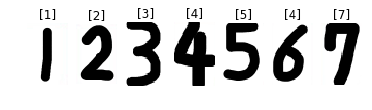

In [2]:
from detect_zip import *
import matplotlib.pyplot as plt

from sklearn.externals import joblib

# 学習済み手書き数字のデータを読込
clf = joblib.load("digits.pkl")

# 画像から領域を読み込む
cnts, img = detect_zipno("hagaki1.png")

# 読み込んだデータをプロット
for i, pt in enumerate(cnts):
    x, y, w, h = pt
    # 枠線の輪郭分だけ小さくする
    x += 8
    y += 8
    w -= 16
    h -= 16
    # 画像データを取り出す
    im2 = img[y:y+h, x:x+w]
    # データを学習済みデータに合わせる
    im2gray = cv2.cvtColor(im2, cv2.COLOR_BGR2GRAY) # グレイスケールに
    im2gray = cv2.resize(im2gray, (8, 8)) # リサイズ
    im2gray = 15 - im2gray // 16 # 白黒反転
    im2gray = im2gray.reshape((-1, 64)) # 一次元に変換
    # データ予測する
    res = clf.predict(im2gray)
    # 画面に出力
    plt.subplot(1, 7, i + 1)
    plt.imshow(im2)
    plt.axis("off")
    plt.title(res)

plt.show()
